In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
legodf = pd.read_csv(r"C:\Users\user\Lego_Games_Analysis\lego_sets.csv")
themes = pd.read_csv(r"C:\Users\user\Lego_Games_Analysis\themes.csv")
parentdf = pd.read_csv(r"C:\Users\user\Lego_Games_Analysis\parent_themes.csv")
sets = pd.read_csv(r"C:\Users\user\Lego_Games_Analysis\sets.csv")

In [3]:
print(themes.head(10))

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0
5   6         Airport        5.0
6   7    Construction        5.0
7   8            Farm        5.0
8   9            Fire        5.0
9  10          Harbor        5.0


In [4]:
print(sets.head(10))

  set_num                          name  year  theme_id  num_parts
0    00-1               Weetabix Castle  1970       414        471
1  0011-2             Town Mini-Figures  1978        84         12
2  0011-3    Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1            Space Mini-Figures  1979       143         12
4  0013-1            Space Mini-Figures  1979       143         12
5  0014-1            Space Mini-Figures  1979       143         12
6  0015-1            Space Mini-Figures  1979       143         18
7  0016-1           Castle Mini Figures  1978       186         15
8    00-2  Weetabix Promotional House 1  1976       413        147
9    00-3  Weetabix Promotional House 2  1976       413        149


In [5]:
print(parentdf.head(10))

    id               name  is_licensed
0    1            Technic        False
1   22            Creator        False
2   50               Town        False
3  112             Racers        False
4  126              Space        False
5  147            Pirates        False
6  155  Modular Buildings        False
7  158          Star Wars         True
8  186             Castle        False
9  204      Designer Sets        False


In [6]:
print(legodf.head(10))

  set_num                          name  year  num_parts    theme_name  \
0    00-1               Weetabix Castle  1970      471.0        Castle   
1  0011-2             Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3    Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1            Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1            Space Mini-Figures  1979       12.0  Supplemental   
5  0014-1            Space Mini-Figures  1979       12.0  Supplemental   
6  0015-1            Space Mini-Figures  1979        NaN  Supplemental   
7  0016-1           Castle Mini Figures  1978        NaN        Castle   
8    00-2  Weetabix Promotional House 1  1976        NaN      Building   
9    00-3  Weetabix Promotional House 2  1976        NaN      Building   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
3        Space  
4        Space  
5        Space  
6        Space  
7       Castle  
8     Legoland  
9     Legoland 

In [7]:
# Percentage of all licenced sets were starwars themed
merged = legodf.merge(parentdf,left_on="parent_theme", right_on="name")
merged.drop(columns='name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [8]:
#removing null values
merged.dropna(subset='set_num', inplace=True)
merged['set_num'].isnull().sum()

0

### 1. How has the number of LEGO sets released per year changed over time?

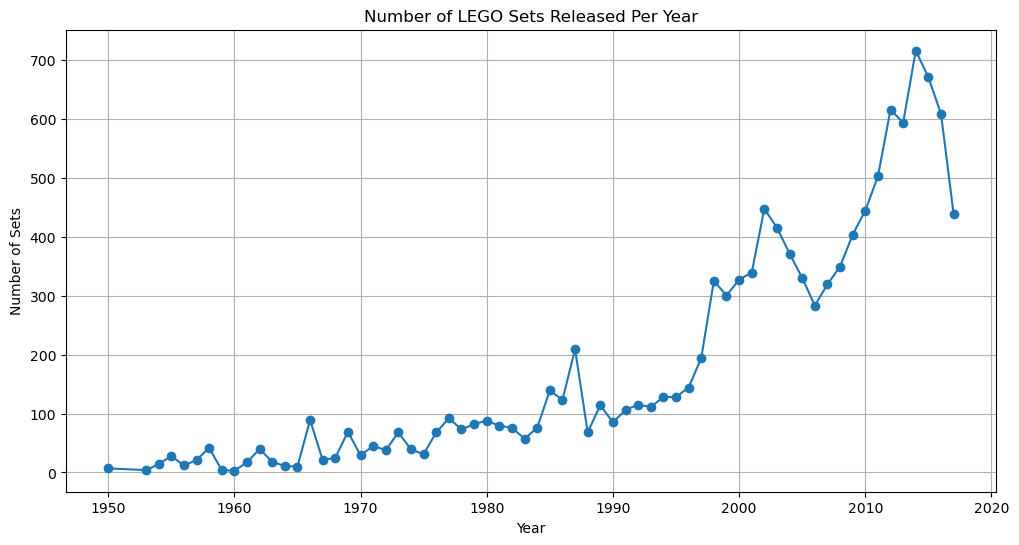

In [10]:
sets_per_year = merged.groupby('year').set_num.count().reset_index()
sets_per_year.columns = ['year', 'num_sets']

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(sets_per_year['year'], sets_per_year['num_sets'], marker='o')
plt.title("Number of LEGO Sets Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.grid(True)
plt.show()

###  2. What are the most common LEGO themes?

In [12]:
common_themes = merged['theme_name'].value_counts().reset_index()
common_themes.columns = ['theme_name', 'count']

print(common_themes.head(10))  # Top 10 themes

      theme_name  count
0   Supplemental    497
1        Technic    439
2           City    296
3        Friends    285
4          Duplo    260
5      Basic Set    257
6        Creator    252
7           Gear    246
8  Service Packs    242
9      Star Wars    211


### 3. What are the largest LEGO sets ever released?

In [14]:
largest_sets = merged.sort_values("num_parts", ascending=False)
print(largest_sets[['set_num', 'name_x', 'num_parts']].head(10))

        set_num                        name_x  num_parts
170     10189-1                     Taj Mahal     5922.0
1371  2000409-1        Window Exploration Bag     5200.0
161     10179-1       Millennium Falcon - UCS     5195.0
3225    40179-1  Personalised Mosaic Portrait     4501.0
234     10253-1                       Big Ben     4166.0
7723    71040-1             The Disney Castle     4060.0
236     10255-1               Assembly Square     4009.0
3891    42055-1        Bucket Wheel Excavator     3928.0
162     10181-1      Eiffel Tower 1:300 Scale     3428.0
8199    75059-1                   Sandcrawler     3294.0


### 4. How many parts do sets typically have per year?

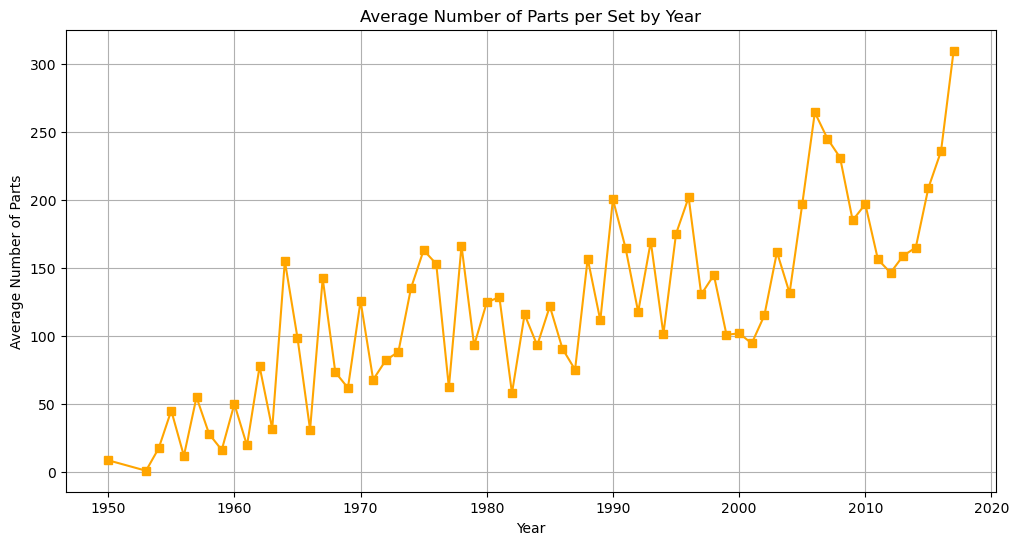

In [17]:
avg_parts_per_year = merged.groupby('year')['num_parts'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(avg_parts_per_year['year'], avg_parts_per_year['num_parts'], color='orange', marker='s')
plt.title("Average Number of Parts per Set by Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Parts")
plt.grid(True)
plt.show()

### 5. Which years saw the introduction of the most new themes?

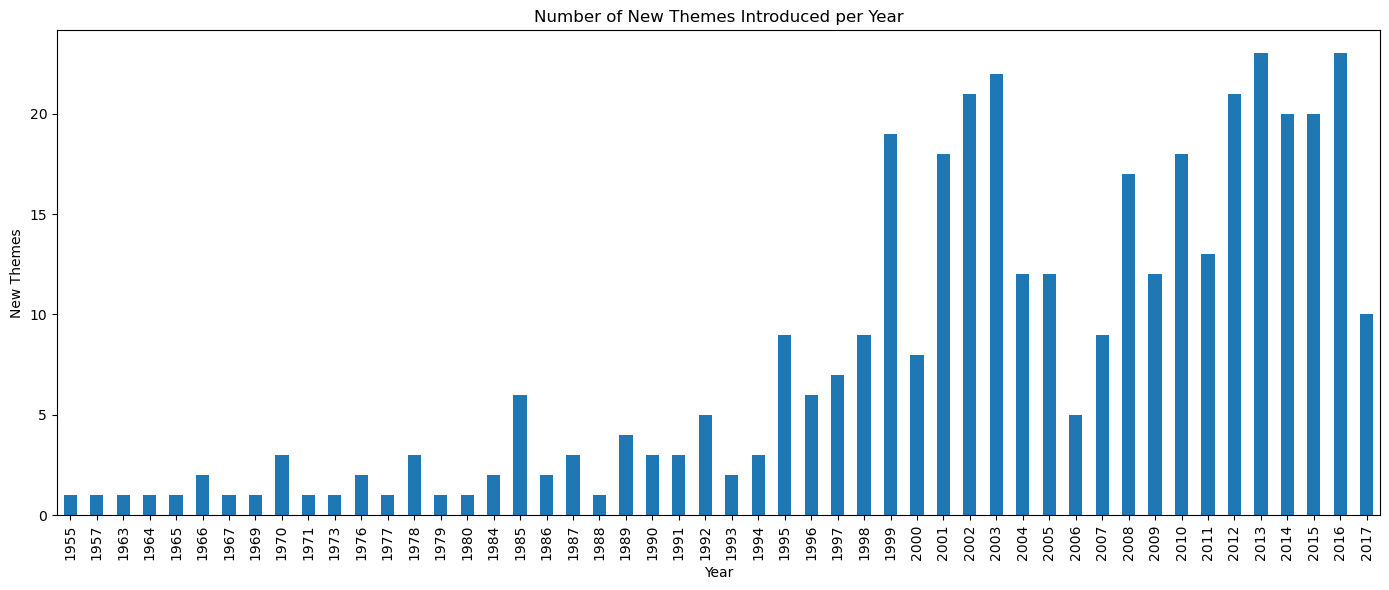

In [19]:
new_themes = merged.drop_duplicates(subset=['theme_name'])
themes_per_year = new_themes['year'].value_counts().sort_index()

# Plot
themes_per_year.plot(kind='bar', figsize=(14,6))
plt.title("Number of New Themes Introduced per Year")
plt.xlabel("Year")
plt.ylabel("New Themes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 6. What percent of all licenced sets were starwars themed

In [21]:
#Step by step filtering
licensed = merged[merged['is_licensed']]

Star_Wars = licensed[licensed['parent_theme'] == "Star Wars"]
print(Star_Wars.head())

     set_num                         name_x  year  num_parts  \
44   10018-1                     Darth Maul  2001     1868.0   
45   10019-1    Rebel Blockade Runner - UCS  2001        NaN   
54   10026-1        Naboo Starfighter - UCS  2002        NaN   
57   10030-1  Imperial Star Destroyer - UCS  2002     3115.0   
116  10123-1                     Cloud City  2003      707.0   

                  theme_name parent_theme   id  is_licensed  
44                 Star Wars    Star Wars  158         True  
45   Star Wars Episode 4/5/6    Star Wars  158         True  
54       Star Wars Episode 1    Star Wars  158         True  
57   Star Wars Episode 4/5/6    Star Wars  158         True  
116  Star Wars Episode 4/5/6    Star Wars  158         True  


In [53]:
# Percentage of all licenced sets were starwars themed
the_force = int(Star_Wars.shape[0] / licensed.shape[0]*100)
print(the_force)
the_force = 51

51
